Для практического знакомства с теорией вероятности мы воспользуемся методом Монте-Карло. В дальнейшем мы уделим больше внимания практическому применению метода, а пока просто используем его элементы.

## Метод Монте-Карло

Это метод моделирования некоторого процесса с помощью случайных чисел. Грубо говоря, мы много раз бросаем шарик на крутящуюся рулетку, подсчитываем как часто выпадает "зеро" и делаем на этом основании выводы.

https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%9C%D0%BE%D0%BD%D1%82%D0%B5-%D0%9A%D0%B0%D1%80%D0%BB%D0%BE

Метод позволяет в том числе решать задачи по теории вероятности. Менее эффективно, чем аналитические способы, однако позволяет. Для этого фактически мы используем *классическое определение*: вероятность это отношение числа всех благоприятных событий к числу всех событий.

https://ru.wikipedia.org/wiki/%D0%92%D0%B5%D1%80%D0%BE%D1%8F%D1%82%D0%BD%D0%BE%D1%81%D1%82%D1%8C#%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%BE%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5

Предположим, у нас есть игральный кубик с 6 гранями (1, 2, 3, 4, 5, 6). Какова вероятность выпадения 1 очка?

Для решения задачи просто бросим кубик 10000 раз, посмотрим сколько раз выпадет 1 и поделим число 1 к числу бросков. Используем модуль random:

import random
dice = [1, 2, 3, 4, 5, 6]
results = [random.choice(dice) for i in range(10000)]
results.count(1)/len(results)

Обычно получается довольно похоже на правду.

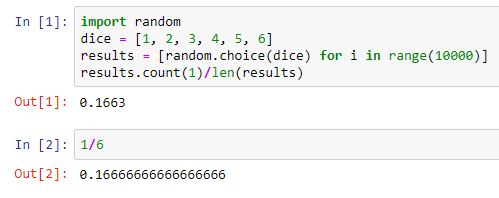 

Примечание.

Задачи этого раздела решаются с помощью генерации случайных наборов данных. Это означает, что при определённом стечении обстоятельств у вас даже 10 бросков монеты может выпасть "на ребро". Поэтому в задачах допускается небольшое отклонение от эталонного ответа (как правило в пределах 1 десятой). Тем более эталон тоже получается методом Монте-Карло и может отличаться от истинного значения вероятности.


# Разминка

В D&D используются самые разные "кубики" для моделирования какого-то действия. С 4, 6, 8, 10, 12, 20 и даже особое устройство, со 100 гранями.

На вход подаётся количество граней у эмулируемой игральной кости.

Выведите на печать вероятность в процентах выпадения грани 1, округлив до 1 знака после запятой.

In [1]:
import random


dice = [i for i in range(1, int(input())+1)]
results = [random.choice(dice) for _ in range(1000000)]
print(f'{round(results.count(1)/len(results)*100,1)}%')

100
1.0%


# Задача 1.1

На вход подаётся 2 числа: n, m

- n - число подброшенных абсолютно одинаковых монет (независимо)
- m - число решек, которые нас интересуют

Выведите на печать вероятность в процентах выпадения ровно m решек при броске n монет, округлив до 1 знака после запятой.

In [24]:
import random


def simulate(n, k, prob = 0.5, trials = 1_000_000):
    successes = 0
    for i in range(trials):
        trial = ''.join('Решка' if random.random() < prob else 'Орел' for _ in range(n))
        if trial.count('Решка') == k: successes += 1
    return successes/trials


n = int(input("Введите число монет: "))
m = int(input("Введите число решек: "))

res = simulate(n, m)

print(f'{round(res * 100, 1)}%')

Введите число монет: 3
Введите число решек: 0
12.6%


# Задача 1.2

На вход подаётся 2 числа: n, m

- n - число подброшенных абсолютно одинаковых монет (независимо)
- m - число решек, которые нас интересуют

Выведите на печать вероятность в процентах выпадения не более m решек при броске n монет, округлив до 1 знака после запятой.

In [25]:
import random


def simulate(n, k, prob = 0.5, trials = 1_000_000):
    successes = 0
    for i in range(trials):
        trial = ''.join('Решка' if random.random() < prob else 'Орел' for _ in range(n))
        if trial.count('Решка') <= k: successes += 1
    return successes/trials


n = int(input("Введите число монет: "))
m = int(input("Введите число решек: "))

res = simulate(n, m)

print(f'{round(res * 100, 1)}%')

Введите число монет: 3
Введите число решек: 2
87.5%


In [26]:
# Аналитическое решение
from math import factorial


def comb(n, m):
    return factorial(n) / (factorial(n - m) * factorial(m))


n = int(input()) #число испытаний
m = int(input()) #число решек

p = 1 - sum(comb(n, m) for m in range(m + 1, n + 1)) / 2 ** n

print(f'{p * 100}%')

3
1
50.0%


In [27]:
import random


n, m = int(input()), int(input())
s = 1_000_000  # количество бросков
r = 0  # сколько раз выпало то что надо

for _ in range(s):
    temp = sum(random.randint(0, 1) for _ in range(n))
    r += int(temp <= m)

    
print(f'{round(r*100/s, 1)}%')

5
3
81.3%


С одной игральной костью дело обстоит до неприличия просто. 

Напомню, что вероятность находится по формуле $P=m/n$, 

где $n$ - число всех равновозможных элементарных исходов эксперимента с подбрасыванием кубика или кости, 

а $m$ - число тех исходов, которые благоприятствуют событию. 

# Задача 2.1

Брошено N игральных костей с M гранями (см. разминочную задачу). Какова вероятность выпадения ровно K очков в сумме?

На вход подаётся 3 числа: N, M, K

Выведите на печать вероятность в процентах, округлив до 1 знака после запятой.

In [135]:
# Аналитическое решение
# Работает с 
# 2
# 6
# 7

# 16.6%

import numpy as np 


N = int(input())
M = int(input())
K = int(input())

arrays = [np.arange(1, M+1) for _ in range(M)]

matrix = np.matrix(arrays)

for i in range(1, M+1):
    matrix[i-1, :] += i 
    
    
m = (matrix == K).sum() 

n = M**N 

print(f'{round(m*100/n, 1)}%')

3
4
6
4.7%


In [145]:
N = int(input())
M = int(input())
K = int(input())


def f(m, n, x): 
    table=[[0]*(x + 1) for i in range(n + 1)]
    for j in range(1, min(m + 1, x + 1)): 
        table[1][j]=1

    for i in range(2, n+1): 
        for j in range(1, x+1): 
            for k in range(1, min(m+1, j)): 
                table[i][j]+=table[i-1][j-k] 

    return table[-1][-1] 


m = f(N, M, K)
n = M**N

print(f'{round(m*100/n, 1)}%')

5
10
15
2.0%


In [146]:
N = int(input())
M = int(input())
K = int(input())


def fun(f, d, s): 
    mem = [[0 for i in range(s+1)] for j in range(d+1)] 
    mem[0][0] = 1
    for i in range(1, d+1): 
        for j in range(1, s+1):  
            mem[i][j] = mem[i][j - 1] + mem[i - 1][j - 1] 
            if j - f - 1 >= 0: 
                mem[i][j] -= mem[i - 1][j - f - 1] 
    return mem[d][s] 


m = fun(N, M, K)
n = M**N

print(f'{round(m*100/n, 1)}%')


5
10
15
2.0%


In [149]:

N = int(input())
M = int(input())
K = int(input())

def count(n, m, k):
    if n == 0:
        return 1 if (k == 0) else 0
 
    if k < 0 or m * n < k or n > k:
        return 0
 
    result = 0
 
    for i in range(1, m + 1):
        result += count(n - 1, m, k - i)
 
    return result
 

m = count(N,M,K)
n = M**N
print(f'{round(m*100/n, 1)}%')

3
4
6
15.6%


In [ ]:
# Монте-Карло
import random
import numpy as np


n = int(input())
m = int(input())
k = int(input())

dices = np.arange(m) + 1

results = [sum(random.choices(dices, k=n)) for i in range(300000)]

ttl = 100 * results.count(k) / len(results)

print(f'{round(ttl,1)}%')

In [ ]:
# Аналитическое решение (не Монте-Карло). 
# Создаем все множество комбинаций n костей с m гранями, 
#а потом сравниваем каждую комбинацию с суммой k.
import numpy as np
from itertools import product


n = int(input())
m = int(input())
k = int(input())

# Общее количество исходов:
r = m**n
res = 0

# Создаем матрицу (в строке значения на гранях кости, кол-во строк = кол-ву костей)
kosti = np.tile(np.arange(1, m+1), [n, 1])


# Создаем итератор перебора различных комбинаций
combine = product(*kosti, repeat=1) # * - распакуем матрицу


# Посчитаем сумму в кортежах 
for comb in combine:
    if sum(comb) == k:
        res += 1


print('{:.1%}'.format(res/r))

# Задача 2.2

Брошено N игральных костей с M гранями. Какова вероятность выпадения K или больше очков в сумме?

На вход подаётся 3 числа: N, M, K

Выведите на печать вероятность в процентах, округлив до 1 знака после запятой.

In [8]:
from random import choice


n, m, k = [int(input()) for _ in range(3)]

iters = 1_000_000

dice = [i+1 for i in range(m)]

positive = sum(1 for _ in range(iters) if sum([choice(dice) for _ in range(n)]) >= k)

print(f'{round(positive/iters * 100, 1)}%')

3
4
8
50.0%


# Задача 3.1

Лента длиной L сантиметров разрезается на 2 куска в случайном месте.

Найдите вероятность того, что один из кусков имеет длину не менее M сантиметров.

На вход подаётся 2 числа: L, M

Выведите на печать вероятность в процентах, округлив до 1 знака после запятой.

Здесь мы имеем дело с непрерывными случайными величинами. Поскольку M имеет равные шансы оказаться равной любому числу из интервала [0, L], то плотность вероятности будет описываться прямой вида f(M) = a*M + b. Первая точка прямой - это значение при M = L (Вероятность получить один из отрезов не менее L равно нулю). f(M) = 0. Вторая точка M = L/2 (Вероятность получить один из отрезов не менее L/2 равно 1). f(M) = 1. Получаем систему линейных уравнений, находим коэффициенты a и b и задаем функцию.

In [1]:
def f(l, m):
    if m <= l/2:
        return 1
    elif m >= l:
        return 0
    else:
        return (-2*m/l) + 2
    
L = int(input())
M = int(input())

print('{:.1%}'.format(f(L, M)))

100
80
40.0%


In [5]:
from random import uniform

L = int(input())
M = int(input())
res = 0
iters = 1_000_000

for i in range(iters):
    j = uniform(0, L)
    if (j >= M) or (L-j >= M):
        res += 1


print('{:.1%}'.format(res/iters))


100
80
39.9%


Лента длиной L сантиметров разрезается на N кусков в случайных местах (т.е. делают N-1 разрез).

Найдите вероятность того, что один из кусков имеет длину не менее M сантиметров.

На вход подаётся 3 числа: L, N, M

Выведите на печать вероятность в процентах, округлив до 1 знака после запятой.

Пример L=100, N = 4, M = 30

Cгенерим 3  числа между 0-100

Cгенеренные числа в отсортированном виде:  [10,  30,  60]

В конце можно добавить сам L:  [10.0,  30,  60, 100]

Находим расстояние между числами, это есть длины кусков ленты.

[10,  20, 30,  40] 

Максимальное расстоение - 40, оно больше M, значит его добавим в массив.

Совет тут может быть только один алгоритмически - создать N-1 чисел, упорядочить их по возрастанию, вычислить интервалы между началом и 1 точкой, между 1 и 2 точкой, ... между N-2 точкой и N,-1 между N-1 точкой и концом. Посмотреть есть ли среди интервалов хотя бы 1 (можно взять самый большой интервал), который не меньше M.

Повторить процедуру много-много раз. Посчитать сколько раз подходящий интервал нашёлся, из всех опытов.

Важно понимать, что если в опыте получилось 2 подходящих интервала, это всё равно 1 удача. Важно не забывать что числа могут генерироваться в любом порядке, поэтому правильно считать интервалы.

Ну по крайней мере я бы придерживался такой схемы.

In [2]:
import numpy as np 


L = int(input())  # длина ленты
N = int(input())  # кол-во кусков
M = int(input())  # длина куска
result = 0        # кол-во удач
iters = 1_000_000 # кол-во экспериментов 

for i in range(iters):
    j = np.random.uniform(0,L,N-1) # точки где мы делаем разрез
    j = np.append(j,[L, 0])        # добовляем начало и конец отрезка 
    j = np.sort(j)                  
    j = np.diff(j)                 #  вычислить интервалы между точками a[i+1] - a[i] 
    j = np.max(j)
    if (j >= M):                   # наш разрезанный кусок больше предположенного куска
        result += 1


print('{:.1%}'.format(result/iters))

100
2
80
40.1%


# Задача 4.1

В трамвайном парке имеются N трамваев маршрута №1 и M трамваев маршрута №2. Какова вероятность того, что вторым по счету на линию выйдет трамвай маршрута №1?

На вход подаётся 2 числа: N, M

Выведите на печать вероятность в процентах, округлив до 1 знака после запятой.

In [7]:
# аналетическое 
N = float(input())
M = float(input())

P = (N/(N+M)) * ((N-1)/(M+N-1))  +  (M/(N+M)) * (N/(N+M-1))

print('{:.1%}'.format(P))

15
10
60.0%


In [18]:
# теоретическое 
import random


n, m, iters, result = int(input()), int(input()), 1_000_000, 0
tram = [1] * n + [2] * m # список трамваев 

for _ in range(iters):
    random.shuffle(tram)
    if tram[1] == 1:
        result += 1

print('{:.1%}'.format(result/iters))

15
10
60.1%


# Задача 4.2

В трамвайном парке имеются N трамваев маршрута №1 и M трамваев маршрута №2. Какова вероятность того, что K-м по счету на линию выйдет трамвай маршрута №1?

На вход подаётся 3 числа: N, M, K

In [38]:
import numpy as np 


n, m, k, iters, result = int(input()), int(input()), int(input()), 1_000_000, 0
tram = [1] * n + [2] * m  # список трамваев 

for _ in range(iters):
    np.random.shuffle(tram)
    if tram[k-1] == 1:
        result += 1

print('{:.1%}'.format(result/iters))

15
10
2
60.0%


# Задача 4.3

Ситуация усложняется. В трамвайном парке может быть много больше чем 2 вида маршрутов. И для поездки на работу или домой вам может подойти не 1, а сразу несколько маршрутов.

- В 1 строке передаются идентификаторы маршрутов (это могут быть как числа, так и цифро-буквенные обозначения), разделённые пробелами
- Во 2 строке передаётся количество трамваев каждого маршрута в парке (в том же порядке в котором передавались их идентификаторы)
- В 3 строке передаются идентификаторы (1 или несколько) целевых трамваев, разделённые пробелами (гарантируется, что все они есть в депо)
- В 4 строке передаётся номер идущего по счёту трамвая (число)

Какова вероятность того что этот трамвай принадлежит одному из целевых маршрутов?

In [62]:
import numpy as np 


# Вытянуть многомерный список
def list_pull(L):
    return [x for y in L for x in list_pull(y)] if isinstance(L, list) else [L]


tram_depo = list(map(list_pull, input().split())) # трамвая в депо
cnt_tram = list(map(int, input().split()))        # их кол-во
tram_need = list(input().split())                 # подходящие трамваи 
k = int(input())                                  # каким должен быть по счету 
park = []
iters = 1_000_000
result = 0

# сколько и какие трамвая в депо
for i in range(len(tram_depo)):
    park += tram_depo[i] * cnt_tram[i]  
    
    
for _ in range(iters):
    np.random.shuffle(park)
    if park[k-1] in tram_need:
        result += 1


print('{:.1%}'.format(result/iters))

1 2 3 4 5
1 2 3 4 5
1 3 5 
1
60.0%


# Задача 5

Из ящика, содержащего N билетов с номерами 1, 2,...,N вынимают по одному все билеты. Предполагается, что все последовательности номеров билетов имеют одинаковые вероятности. Найти вероятность того, что хотя бы у одного билета порядковый номер совпадает с собственным.

На вход подаётся 1 число - N

Выведите на печать вероятность в процентах, округлив до 1 знака после запятой.

напоминает задачу с фантами 

In [78]:
import random


n = int(input())
iters = 1_000_000
result = 0

for _ in range(iters):
    if all(map(lambda x,y: x - y,range(n),random.sample(range(n),n))):
        result += 1

result = iters - result
    
print('{:.1%}'.format(result/iters))

4
62.5%


In [ ]:
import numpy as np


num, tries, success = int(input()), 1000000, 0

tickets = np.arange(1, num+1)

golden_standart = np.arange(1, num+1)

for _ in range(tries):
    np.random.shuffle(tickets)
    success+=(1 if any(tickets==golden_standart) else 0)
    
    
print('{:.1%}'.format(success/tries))

# Задача 6

🂡🂢🂣🂤🂥🂦🂧🂨🂩🂪🂫🂭🂮

🂱🂲🂳🂴🂵🂶🂷🂸🂹🂺🂻🂽🂾

🃁🃂🃃🃄🃅🃆🃇🃈🃉🃊🃋🃍🃎

🃑🃒🃓🃔🃕🃖🃗🃘🃙🃚🃛🃝🃞

Это полный набор символов Unicode, соответствующих всем 52 игральным картам стандартной колоды карт - https://en.wikipedia.org/wiki/Playing_cards_in_Unicode

Особенно нас интересуют тузы:
🂡🂱🃁🃑

На вход подаётся строка из символов-карт. Гарантируется, что в ней есть все 4 туза ровно по 1 экземпляру, однако остальные карты могут отсутствовать или дублироваться.

Колода хорошо равномерно перемешивается.

Какова вероятность, что все 4 туза в ней идут подряд (не важно в каком порядке)?

in1:

🂡🂦🂧🂨🂩🂪🂫🂭🂮🂱🂶🂷🂸🂹🂺🂻🂽🂾🃁🃆🃇🃈🃉🃊🃋🃍🃎🃑🃖🃗🃘🃙🃚🃛🃝🃞

out1: 0.06%

in2:

🂡🂱🃁🃑🃖🃖🃖🃖🃖🃖🃖🃖🃖🃖🃖🃖🃖🃖🃖🃖🃖🃖🃖🃖🃖🃖🃖🃖🃖🃖🃖🃖🃖🃖🃖🃖

out2: 0.06%

in3:

🂡🂱🃁🃑🃖

out3:

40.12%

In [98]:
# аналетическое решение 
n = input()
l = len(n)
p = ((4*3*2*1)/(l*(l-1)*(l-2)))
print('{:.2%}'.format(p))

🂡🂦🂧🂨🂩🂪🂫🂭🂮🂱🂶🂷🂸🂹🂺🂻🂽🂾🃁🃆🃇🃈🃉🃊🃋🃍🃎🃑🃖🃗🃘🃙🃚🃛🃝🃞
0.06%


In [99]:
from math import factorial 


x = len(input())
print('{:.2%}'.format((factorial(x-4+1)*factorial(4))/factorial(x)))

🂡🂱🃁🃑🃖
40.00%


In [108]:
# Монте-Карло 
import numpy as np

# считаем кол-во всего карт
x = len(input())
# создадим 4 туза и другие карты 
cards = np.concatenate((np.zeros(x-4), np.ones(4)))

iters = 10_000_000
success = 0

for _ in range(iters):
    y = 0
    np.random.shuffle(cards)
    
    for j in range(x):
        if cards[j] and y == 0: 
            y += 1
        elif cards[j] and y > 0 and cards[j-1]: 
            y += 1


    if y == 4: 
        success+=1

print('{:.2%}'.format(success / iters))

🂡🂱🃁🃑🃖
40.00%
